# Convert To RINEX

This python script converts between two file formats that are vital in the field of satellite navigation.

The script rely on two specific tools for handling **.T04** file(Trimble Format).

The first tool is *runpkr00* that allows to extract **.TGD** files from **.T04** logged by Trimble GNSS receivers.

The second tool is *teqc*, it takes the output of *runpkr00* and convert it into **RINEX** (Receiver Independent Exchange Format) files with **.YYo** or **.obs** for observation and **.YYn** or **.nav** for navigation.

For open-source processing, this conversion is necessary.

N.B: The two tools are Open-source.

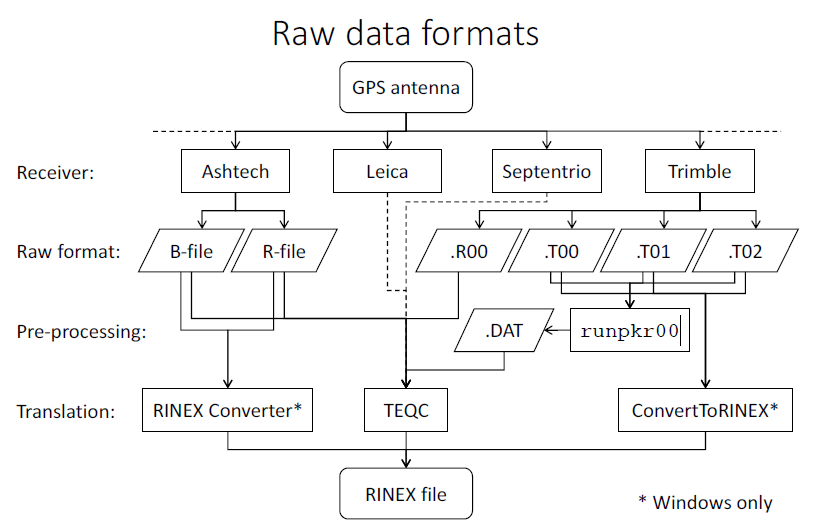

In [1]:
from IPython import display
display.Image("D:/3CI/PFE/PFE_Allemagne/Updates/Workflow of conversion.png")

## Importing the packages

In [2]:
import os,sys,subprocess,glob,shutil

In [3]:
#Specify the directories

#Of Raw Measurements
Raw_GNSS='C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/'
#Of the runpkr tool
runpkr='C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/runpkr00'
#Of the teqc tool
teqc='C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/teqc'
#Where to put the result (.obs & .nav)
Result='C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/'
#Where to put the final merged (.obs & .nav) 
rover_files='C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/Rover/'

## Specify directories and getting files

In [4]:
#Create the Directory of Results if doesn't exist

if not os.path.exists(Result):
    os.makedirs(Result)
else:
    print("Result Path Already exist")
if not os.path.exists(rover_files):
    os.makedirs(rover_files)
else:
    print("\nRover Path Already exist")

Result Path Already exist

Rover Path Already exist


In [5]:
#Getting list of files

files=[]
for file in glob.glob(Raw_GNSS+'*.T04'):
    file=file.replace('\\','/')
    files.append(file)
print(files)   

['C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030934.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030936.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030938.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030940.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030942.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030944.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030946.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030948.T04', 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Applanix/1/5905C00224202112030950.T04', 'C:/Users

## Converting to TGD

In [6]:
#Getting the Raw files and convert them to TGD using a specific cmd

for file in files:
    filename=file.split('/')[-1].split('.T04')[0]
    if not os.path.exists(Raw_GNSS + filename +'.tgd'):
        print(f'Converting {filename} to TGD')
        cmd = runpkr + ' -g ' + ' -d ' + Raw_GNSS + filename + '.T04'
        subprocess.call(cmd, shell=False)
    else:
       print(f'{filename} already converted ')

5905C00224202112030934 already converted 
5905C00224202112030936 already converted 
5905C00224202112030938 already converted 
5905C00224202112030940 already converted 
5905C00224202112030942 already converted 
5905C00224202112030944 already converted 
5905C00224202112030946 already converted 
5905C00224202112030948 already converted 
5905C00224202112030950 already converted 
5905C00224202112030952 already converted 
5905C00224202112030954 already converted 
5905C00224202112030956 already converted 
5905C00224202112030958 already converted 
5905C00224202112031000 already converted 
5905C00224202112031002 already converted 
5905C00224202112031004 already converted 
5905C00224202112031006 already converted 
5905C00224202112031008 already converted 
5905C00224202112031010 already converted 
5905C00224202112031012 already converted 
5905C00224202112031014 already converted 
5905C00224202112031016 already converted 
5905C00224202112031018 already converted 
5905C00224202112031020 already con

In [7]:
#List of files to convert to RINEX

files_tocopy=[]

for file in os.listdir(Raw_GNSS):
    if file.endswith('.tgd'):
        files_tocopy.append(file)
        source_path = os.path.join(Raw_GNSS, file)
        destination_path = os.path.join(Result, file)
        shutil.copy2(source_path, destination_path)
print("\nList of TGD files to convert to RINEX:")

TGD_files=[]

for file in os.listdir(Result):
    if file.endswith('.tgd'):
      TGD_files.append(file.split('.tgd')[0])
print(TGD_files)


List of TGD files to convert to RINEX:
['5905C00224202112030934', '5905C00224202112030936', '5905C00224202112030938', '5905C00224202112030940', '5905C00224202112030942', '5905C00224202112030944', '5905C00224202112030946', '5905C00224202112030948', '5905C00224202112030950', '5905C00224202112030952', '5905C00224202112030954', '5905C00224202112030956', '5905C00224202112030958', '5905C00224202112031000', '5905C00224202112031002', '5905C00224202112031004', '5905C00224202112031006', '5905C00224202112031008', '5905C00224202112031010', '5905C00224202112031012', '5905C00224202112031014', '5905C00224202112031016', '5905C00224202112031018', '5905C00224202112031020', '5905C00224202112031022']


## Converting to RINEX 

In [8]:
#Getting the TGD files and convert them to Rinex using a specific cmd
#For the observation file

for file in TGD_files:
    filename=file
    if not os.path.exists(Result + filename +'.obs'):
        print(f'Converting {filename} to Observation file')
        command = teqc + ' +C2 '+' +L5 '+ ' +L8 ' + ' -week '+ ' 2186 ' + ' -tr ' + ' d  ' + ' +obs ' + Result + filename + '.obs ' + \
              Result + filename + '.tgd' #Week to modify (add it automaticly)
        subprocess.run(command, shell=False,stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    else:
        print(f'{filename} already converted to obs file')

5905C00224202112030934 already converted to obs file
5905C00224202112030936 already converted to obs file
5905C00224202112030938 already converted to obs file
5905C00224202112030940 already converted to obs file
5905C00224202112030942 already converted to obs file
5905C00224202112030944 already converted to obs file
5905C00224202112030946 already converted to obs file
5905C00224202112030948 already converted to obs file
5905C00224202112030950 already converted to obs file
5905C00224202112030952 already converted to obs file
5905C00224202112030954 already converted to obs file
5905C00224202112030956 already converted to obs file
5905C00224202112030958 already converted to obs file
5905C00224202112031000 already converted to obs file
5905C00224202112031002 already converted to obs file
5905C00224202112031004 already converted to obs file
5905C00224202112031006 already converted to obs file
5905C00224202112031008 already converted to obs file
5905C00224202112031010 already converted to ob

In [9]:
#For the navigation file
for file in TGD_files:
    filename=file
    if not os.path.exists(Result + filename +'.nav'):
        print(f'Converting {filename} to Navigation file')
        command = teqc +  ' +nav ' + Result + filename + '.nav ' + \
              Result + filename + '.tgd' #Week to modify (add it automaticly)
        subprocess.run(command, shell=False,stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    else:
        print(f'{filename} already converted to nav file')

5905C00224202112030934 already converted to nav file
5905C00224202112030936 already converted to nav file
5905C00224202112030938 already converted to nav file
5905C00224202112030940 already converted to nav file
5905C00224202112030942 already converted to nav file
5905C00224202112030944 already converted to nav file
5905C00224202112030946 already converted to nav file
5905C00224202112030948 already converted to nav file
5905C00224202112030950 already converted to nav file
5905C00224202112030952 already converted to nav file
5905C00224202112030954 already converted to nav file
5905C00224202112030956 already converted to nav file
5905C00224202112030958 already converted to nav file
5905C00224202112031000 already converted to nav file
5905C00224202112031002 already converted to nav file
5905C00224202112031004 already converted to nav file
5905C00224202112031006 already converted to nav file
5905C00224202112031008 already converted to nav file
5905C00224202112031010 already converted to na

## Merging RINEX files

The rover records the observation separatly every 2 min, that why we need to merge the observations files in one file, the same thing for the navigation files  

In [10]:
rover_files+str(TGD_files[0]+'-'+TGD_files[-1])

'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/Rover/5905C00224202112030934-5905C00224202112031022'

In [11]:
#Defining a fct for merge navigation files

def merge_nav(nav_files,output):
   #Input:
   #nav_files: navigation files of the rover
   #output: Path of the output
   #Output:
   #Merged navigation file
   cmd = teqc + " -O.s M {} > {}{}\n".format(' '.join(nav_files), output,'.nav')
   print(cmd)
   result=subprocess.run(cmd,capture_output=True,text=True)
   with open (output+'.nav','w') as f:
    f.write(result.stdout)
    f.close() 
   return print('navigation merging done')

In [12]:
#Defining a fct for merge observation files

def merge_obs(obs_files,output):
   #Input:
   #Obs_files: Observation files of the rover
   #output: Path of the output
   #Output:
   #Merged Observation file
   cmd = teqc +" -O.s M {} > {}{}\n".format(' '.join(obs_files), output,'.obs')
   print(cmd)
   result=subprocess.run(cmd,capture_output=True,text=True)
   with open (output+'.obs','w') as f:
    f.write(result.stdout)
    f.close() 
   return print('observation merging done')

In [13]:
# Merge the obs files

obs_files=[]
merged_observation=rover_files+str(TGD_files[0]+'-'+TGD_files[-1])
for file in os.listdir(Result):
  if file.endswith('.obs'):
     obs=file
     obs_files.append(obs)
if not os.path.exists(merged_observation+'.obs'):
  merge_obs(obs_files,merged_observation)# fct for merge
else:
  print('Observation file already merged')


Observation file already merged


In [14]:
#Merge the nav files

nav_files=[]
merged_navigation=rover_files+str(TGD_files[0]+'-'+TGD_files[-1])
for file in os.listdir(Result):
    if file.endswith('.nav'):
        navigation=file
        nav_files.append(navigation)
if not os.path.exists(merged_navigation+'.nav'):
  merge_nav(nav_files,merged_navigation) #fct for merge
else:
    print('Navigation file already merged')

Navigation file already merged


In [15]:
observation_path=os.path.join(rover_files,str(TGD_files[0]+'-'+TGD_files[-1])+ '.obs')
navigation_path=os.path.join(rover_files,str(TGD_files[0]+'-'+TGD_files[-1])+ '.nav')
#get the path of the obs and nav files
observation_path, navigation_path

('C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/Rover/5905C00224202112030934-5905C00224202112031022.obs',
 'C:/Users/bourriz/GNSS_INS_Processing/UIS_PosPac_HyspexNav_processing/Result/Rover/5905C00224202112030934-5905C00224202112031022.nav')